# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Open a Chrome window using Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# By inspecting the page using Chrome DevTools, we see that the rows of data are 'tr' elements with class 'data-row'
table_data = soup.find_all('tr',class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in table_data:
    # Each data element in a row are 'td' elements so we can scrape them all using 'find_all'
    row_data = row.find_all('td')
    # Store the data in each row in a list and then append that list to 'row_list'
    row_list.append([data.text.strip() for data in row_data])

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create list of column names
column_names_list = []
# Since 'th' elements are all table headers, we can extract them using 'find_all'
column_names = soup.find_all('th')
# Loop through the column_names object and add each column name to 'column_names_list'
for name in column_names:
    column_names_list.append(name.text)
# Create a Pandas Dataframe using the two lists
mars_weather_df = pd.DataFrame(row_list, columns=column_names_list)

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Change 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
# Change 'sol', 'ls', and 'month' to int datatype
mars_weather_df[['sol','ls','month']] = mars_weather_df[['sol','ls','month']].astype(int)
# Change 'min_temp' and 'pressure' to float datatype
mars_weather_df[['min_temp','pressure']] = mars_weather_df[['min_temp','pressure']].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Use 'nunique()' method to determine the number of unique months in Mars
mars_weather_df['month'].nunique()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
# Use 'nunique()' method to determine the number of unique sols and confirm if there are any duplicates or days with multiple measurements in the data set
num_sols = mars_weather_df['sol'].nunique()
num_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
# Use 'mean' method and 'groupby' function to calculate average minimum temperature by month
avg_min_temp_monthly = mars_weather_df.groupby('month')['min_temp'].mean()
avg_min_temp_monthly

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

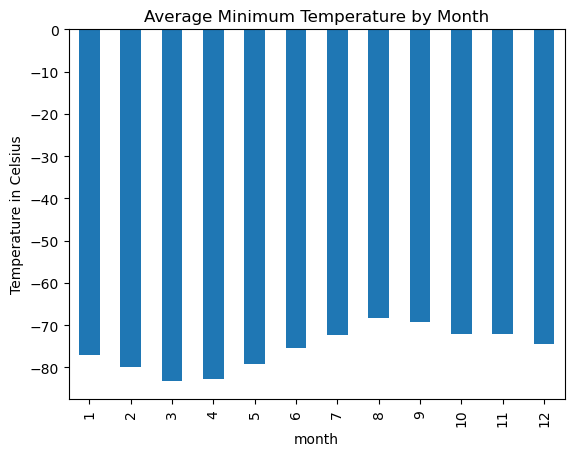

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_monthly.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.show()

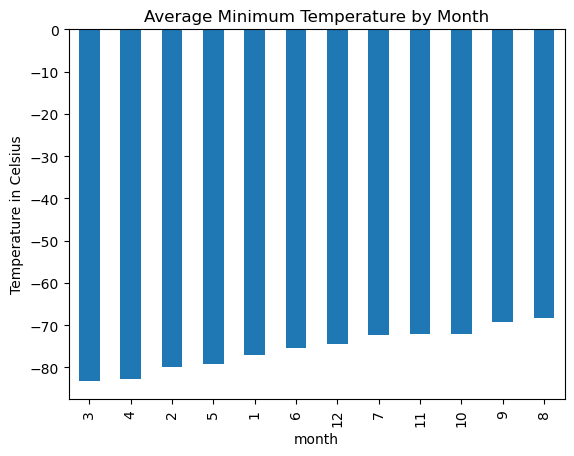

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Include 'sort_values' method to sort the bar graph 
avg_min_temp_monthly.sort_values().plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [17]:
# 4. What is the average pressure by month?
# Use 'mean' method and 'groupby' function to calculate average minimum pressure by month
avg_pressure_monthly = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

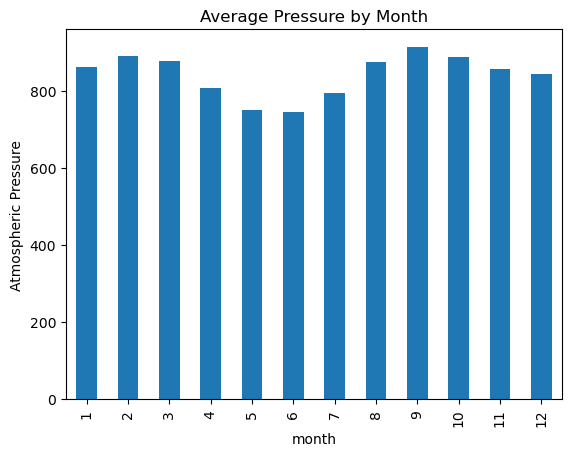

In [18]:
# Plot the average pressure by month
avg_pressure_monthly.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

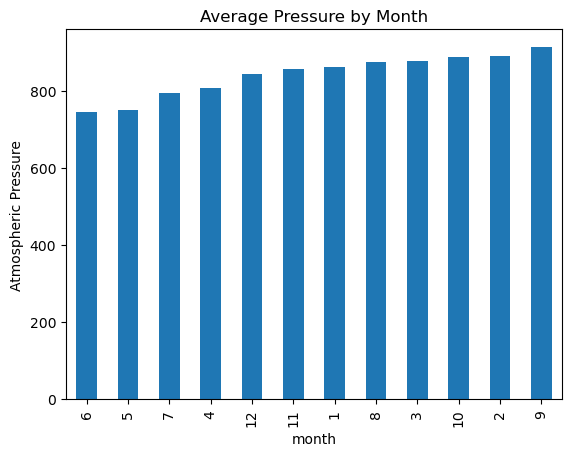

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_monthly.sort_values().plot(kind='bar')
# Include 'sort_values' method to sort the bar graph 
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

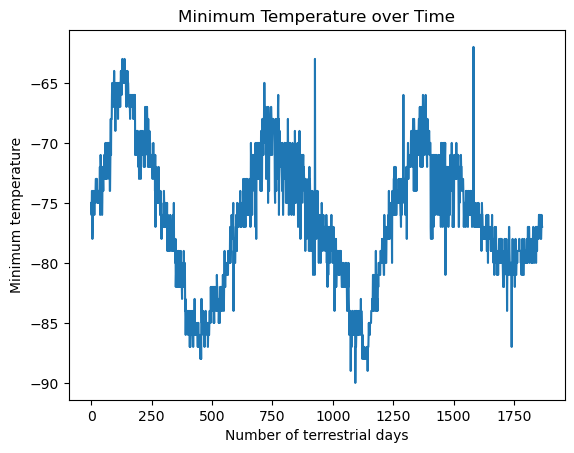

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df.plot(kind='line', y='min_temp', legend=False)
plt.title('Minimum Temperature over Time')
plt.ylabel('Minimum temperature')
plt.xlabel('Number of terrestrial days')
plt.show()

#### Minimum Temperature
The data shows that Martian Month 3 has the lowest average minimum temperatures while Martian Month 8 has the highest average minimum temperature.

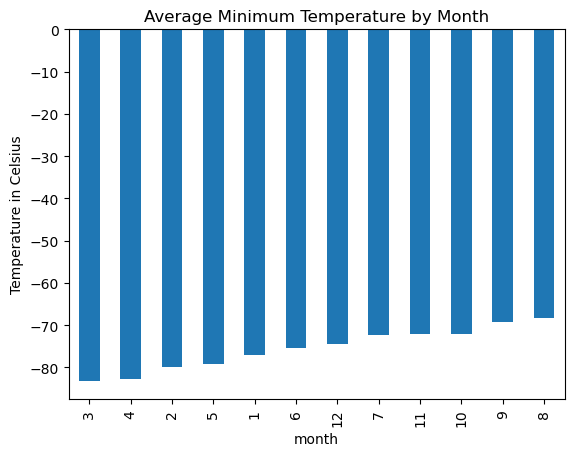

Overall, temperatures appear to follow a cyclical/seasonal pattern of heating and cooling, where average minimum temperatures fall each month in the beginning of the Martian year until reaching their lowest in Martian Month 3 and then rise each month until averge minimum temperatures peak in Martian Month 8 before falling again each month for the remainder of the Martian year.
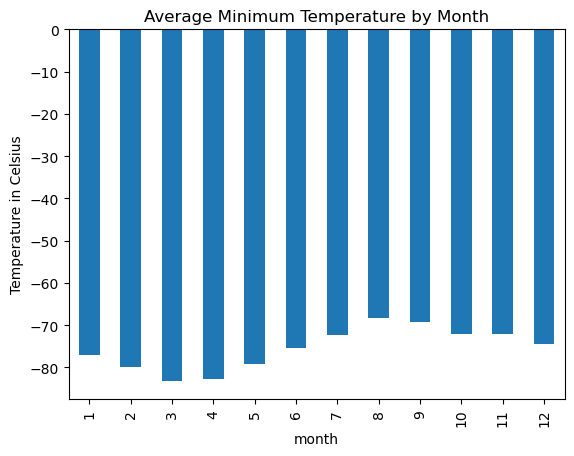


#### Atmospheric Pressure

The data shows that Martian Month 6 has the lowest average atmosphere pressure readings while Martian Month 9 has the highest.

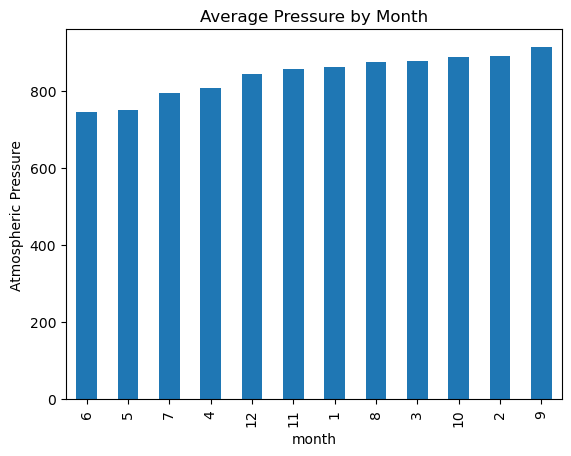

Similar to temperature, atmospheric pressure also appears to follow a seasonal/cyclical pattern but within a shorter time frame where atmospheric pressure rises each month in the beginning of the year until peaking in Martian Month 2, decreases each month until hitting its lowest point in Martian Month 6, and then rises again monthly until peaking a second time during Martian Month 9 before falling yet again each month until Martian year's end.

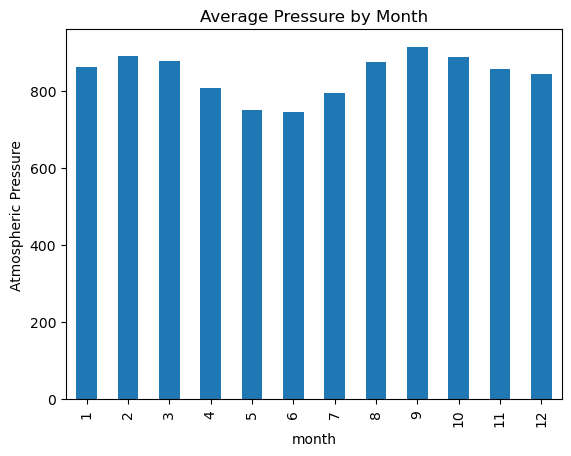

#### Year Length

Based on our analysis of average minimum temperatures, we can infer that temperatures follow a seasonal/cyclical pattern of rising and decreasing temperatures over the course of year.  When we graph the minimum temperatures observed over time, we can visually see the pattern or rising and falling temperatures.  It is therefore possible to estimate the length of a Martian year by identifying the number of terrestrial (Earth) days it takes for one temperature cycle to complete.  If we consider the number of days between peaks in temperature or the number of days between troughs (lowest points) in temperature as the completion of one cycle, we can therefore estimate those days to be the length of a Martian year.

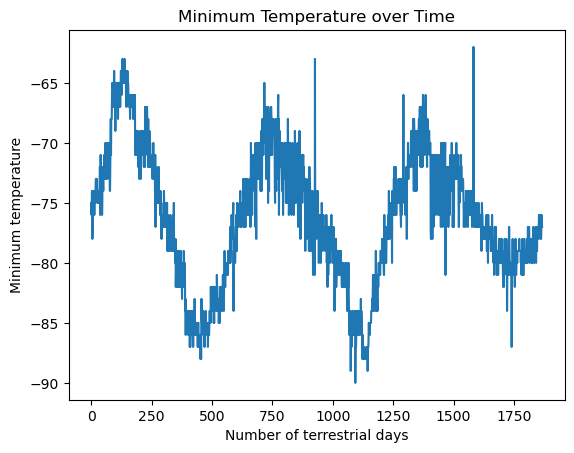

Based on this reasoning and the charted data, we can estimate that one Martian year is approximately 650 - 700 terrestrial (Earth) days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv')

In [22]:
browser.quit()